<a href="https://colab.research.google.com/github/faceracoon/raccoon/blob/master/SWOT_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Информация об исполнителе:

In [ ]:
print('Группа: 20БИ-2')
print('ФИО: Караваев Александр Юрьевич')
!ln -fs /usr/share/zoneinfo/Europe/Moscow /etc/localtime
!date

Группа: 20БИ-2
ФИО: Караваев Александр Юрьевич
Wed Mar  3 21:52:59 MSK 2021


In [ ]:
from google.colab import auth
auth.authenticate_user()
!pip install --upgrade gspread
import gspread
from google.colab import drive
drive.mount('/content/drive')
import os
print(os.getcwd())
print(os.listdir('./'))
print(os.listdir('/content/drive'))
print(os.listdir('/content/drive/MyDrive/Colab Notebooks/'))
%ll -lF /content/drive/MyDrive/"Colab Notebooks"/
from oauth2client.client import GoogleCredentials
gs = gspread.authorize(GoogleCredentials.get_application_default())

Requirement already up-to-date: gspread in /usr/local/lib/python3.7/dist-packages (3.7.0)
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content
['.config', 'drive', 'adc.json', 'sample_data']
['.shortcut-targets-by-id', 'MyDrive', '.file-revisions-by-id', '.Trash']
['test2.txt', 'test1.txt', 'Копия блокнота "Karavaev.ipynb"', 'Karavaev (1).ipynb', 'Karavaev.ipynb', 'SWOT.gsheet', 'SWOT_Analysis.ipynb']
total 48
-rw------- 1 root  3918 Nov 18 12:55 'Karavaev (1).ipynb'
-rw------- 1 root  3950 Dec  9 12:57  Karavaev.ipynb
-rw------- 1 root 34943 Mar 25 14:37  SWOT_Analysis.ipynb
-rw------- 1 root   151 Mar 25 14:36  SWOT.gsheet
-rw------- 1 root    19 Nov 18 12:18  test1.txt
-rw------- 1 root   241 Nov 18 11:11  test2.txt
-rw------- 1 root  4023 Nov 18 12:55 'Копия блокнота "Karavaev.ipynb"'


total 48
-rw------- 1 root  3918 Nov 18 12:55 'Karavaev (1).ipynb'
-rw------- 1 root  3950 Dec  9 12:57  Karavaev.ipynb
-rw------- 1 root 34943 Mar 25 14:37  SWOT_Analysis.ipynb
-rw------- 1 root   151 Mar 25 14:36  SWOT.gsheet
-rw------- 1 root    19 Nov 18 12:18  test1.txt
-rw------- 1 root   241 Nov 18 11:11  test2.txt
-rw------- 1 root  4023 Nov 18 12:55 'Копия блокнота "Karavaev.ipynb"'
1 ['Персональный подход к клиенту\n', 'Квалифицированный обученный рабочий состав', '10', '0.8', '8.00', '30.90']
2 ['Высокое качество продукции\n', 'Cырьё высшей категории', '8', '1', '8.00', '']
3 ['Высокая прибыльность бизнеса', 'Уникальный бизнес-план', '8', '0.9', '7.20', '']
4 ['Большой охват аудитории', 'Расположение кафе в центре города', '7', '0.6', '4.20', '']
5 ['Уникальный интерьер в стиле мф "Шрек"', 'Дизайнер крайне корпотливо проработал дизайн кафе', '7', '0.5', '3.50', '']


['Персональный подход к клиенту\n', 'Высокое качество продукции\n', 'Высокая прибыльность бизнеса', 'Большой 

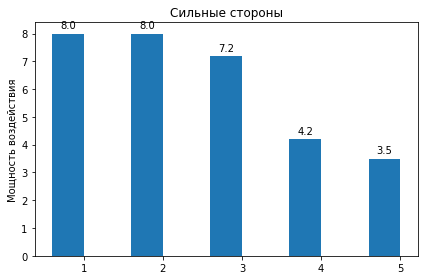

1 - Персональный подход к клиенту

2 - Высокое качество продукции

3 - Высокая прибыльность бизнеса
4 - Большой охват аудитории
5 - Уникальный интерьер в стиле мф "Шрек"


In [ ]:
import os
import time
%ll -lAF /content/drive/MyDrive/"Colab Notebooks"/
os.stat('/content/drive/MyDrive/Colab Notebooks/SWOT.gsheet')
table = gs.open_by_key('1qlFhIagqcxFTlBYO9JMjfjkEijc-IQ7f6GM-4QAsq_w')
worksheet = table.worksheet('Strengths')
rows = worksheet.get_all_values()
name = list()
actions = list()
importance = list()
probability = list()
power = list()
power_sh = list()
power_raw = list()
i=0
for row in rows:
  if(i>0):
    print (i, row)
    name.append(row[0])
    actions.append(row[1])
    importance.append(int(row[2]))
    probability.append(float(row[3]))
    power.append(int(row[2])*float(row[3]))
    power_raw = list()
    power_raw.append(int(row[2])*float(row[3]))
    power_sh.append(power_raw)
  i+=1
worksheet.update('E2:E8', power_sh)
print('\n',name, actions, importance, probability, power, sep='\n', end='\n\n')
strengths_sum = sum(power)
print('Суммарная сила сильный сторон:', strengths_sum)
worksheet.update('F2', strengths_sum)

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
i=0
labels = list()
cols = worksheet.col_values(1)
for col in cols:
  if(i>0):
    labels.append(i)
  i+=1
width = 0.4
fig, ax = plt.subplots()
x = np.arange(len(labels))
rects = ax.bar(x - width/2, power, width)
ax.set_ylabel('Мощность воздействия')
ax.set_title('Сильные стороны')
ax.set_xticks(x)
ax.set_xticklabels(labels)
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects)
fig.tight_layout()
plt.show()              
j=0
for col in cols:
  if(j>0):
    print(j, '-', col)
  j+=1

total 48
-rw------- 1 root  3918 Nov 18 12:55 'Karavaev (1).ipynb'
-rw------- 1 root  3950 Dec  9 12:57  Karavaev.ipynb
-rw------- 1 root 34947 Mar 25 14:39  SWOT_Analysis.ipynb
-rw------- 1 root   151 Mar 25 14:37  SWOT.gsheet
-rw------- 1 root    19 Nov 18 12:18  test1.txt
-rw------- 1 root   241 Nov 18 11:11  test2.txt
-rw------- 1 root  4023 Nov 18 12:55 'Копия блокнота "Karavaev.ipynb"'
1 ['Задержка поставок продукции', 'Заключение юридического договора о постоянных поставках', '9', '0.9', '', '']
2 ['Слабый иммунитет официантов', 'Есть возможность болезни официантов', '7', '0.9', '', '']
3 ['Воровство продуктов персоналом', 'Наблюдение за персоналом посредством видеокамер/охранника', '7', '0.5', '', '']
4 ['Травма повара/кондитера во время готовки', 'Маленькая вероятность', '2', '0.2', '', '']


['Задержка поставок продукции', 'Слабый иммунитет официантов', 'Воровство продуктов персоналом', 'Травма повара/кондитера во время готовки']
['Заключение юридического договора о постоянны

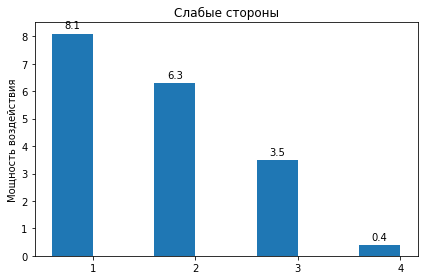

1 - Задержка поставок продукции
2 - Слабый иммунитет официантов
3 - Воровство продуктов персоналом
4 - Травма повара/кондитера во время готовки


In [ ]:
import os
import time
%ll -lAF /content/drive/MyDrive/"Colab Notebooks"/
os.stat('/content/drive/MyDrive/Colab Notebooks/SWOT.gsheet')
table = gs.open_by_key('1qlFhIagqcxFTlBYO9JMjfjkEijc-IQ7f6GM-4QAsq_w')
worksheet = table.worksheet('Weaknesses')
rows = worksheet.get_all_values()
name = list()
actions = list()
importance = list()
probability = list()
power = list()
power_sh = list()
power_raw = list()
i=0
for row in rows:
  if(i>0):
    print (i, row)
    name.append(row[0])
    actions.append(row[1])
    importance.append(int(row[2]))
    probability.append(float(row[3]))
    power.append(int(row[2])*float(row[3]))
    power_raw = list()
    power_raw.append(int(row[2])*float(row[3])) 
    power_sh.append(power_raw)
  i+=1
worksheet.update('E2:E8', power_sh)
print('\n',name, actions, importance, probability, power, sep='\n', end='\n\n')
weaknesses_sum = sum(power)
print('Суммарная сила сильный сторон:', weaknesses_sum)
worksheet.update('F2', weaknesses_sum)

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
i=0
labels = list()
cols = worksheet.col_values(1)
for col in cols:
  if(i>0):
    labels.append(i)
  i+=1
width = 0.4 
fig, ax = plt.subplots()
x = np.arange(len(labels))
rects = ax.bar(x - width/2, power, width)
ax.set_ylabel('Мощность воздействия')
ax.set_title('Слабые стороны')
ax.set_xticks(x)
ax.set_xticklabels(labels)
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects) 
fig.tight_layout()
plt.show()              
j=0
for col in cols: 
  if(j>0):
    print(j, '-', col)
  j+=1

total 74
-rw------- 1 root  3918 Nov 18 12:55 'Karavaev (1).ipynb'
-rw------- 1 root  3950 Dec  9 12:57  Karavaev.ipynb
-rw------- 1 root 61840 Mar 25 14:41  SWOT_Analysis.ipynb
-rw------- 1 root   151 Mar 25 14:45  SWOT.gsheet
-rw------- 1 root    19 Nov 18 12:18  test1.txt
-rw------- 1 root   241 Nov 18 11:11  test2.txt
-rw------- 1 root  4023 Nov 18 12:55 'Копия блокнота "Karavaev.ipynb"'
1 ['Уменьшить кредит', 'Покупка качественного оборудования с рук', '8', '0.8', '5.1', '22.1']
2 ['Высокая посещаемость', 'Люди с детьми, проходящие мимо кафе, будут вынуждены зайти', '9', '0.7', '5.1', '']
3 ['Быстрая готовность заказа', 'Засчёт простоты приготовления блюд', '9', '0.9', '7.1', '']
4 ['Быстрая качественная доставка на дом', 'Наличие большого количества официантов, готовых доставить заказ на дом', '6', '0.5', '1.1', '']


['Уменьшить кредит', 'Высокая посещаемость', 'Быстрая готовность заказа', 'Быстрая качественная доставка на дом']
['Покупка качественного оборудования с рук', 'Люди

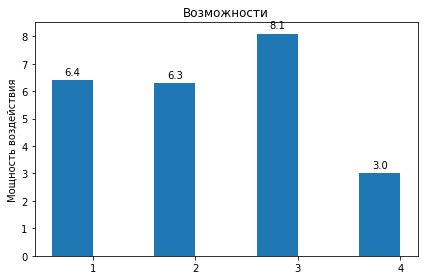

1 - Уменьшить кредит
2 - Высокая посещаемость
3 - Быстрая готовность заказа
4 - Быстрая качественная доставка на дом


In [ ]:
import os
import time
%ll -lAF /content/drive/MyDrive/"Colab Notebooks"/
os.stat('/content/drive/MyDrive/Colab Notebooks/SWOT.gsheet')
table = gs.open_by_key('1qlFhIagqcxFTlBYO9JMjfjkEijc-IQ7f6GM-4QAsq_w')
worksheet = table.worksheet('Opportunities')
rows = worksheet.get_all_values()
name = list()
actions = list()
importance = list()
probability = list()
power = list()
power_sh = list()
power_raw = list()
i=0
for row in rows:
  if(i>0):
    print (i, row)
    name.append(row[0])
    actions.append(row[1])
    importance.append(int(row[2]))
    probability.append(float(row[3]))
    power.append(int(row[2])*float(row[3]))
    power_raw = list()
    power_raw.append(int(row[2])*float(row[3])) 
    power_sh.append(power_raw)
  i+=1
worksheet.update('E2:E8', power_sh)
print('\n',name, actions, importance, probability, power, sep='\n', end='\n\n')
opportunities_sum = sum(power)
print('Суммарная сила сильный сторон:', opportunities_sum)
worksheet.update('F2', opportunities_sum)

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
i=0
labels = list()
cols = worksheet.col_values(1)
for col in cols:
  if(i>0):
    labels.append(i)
  i+=1
width = 0.4 
fig, ax = plt.subplots()
x = np.arange(len(labels))
rects = ax.bar(x - width/2, power, width)
ax.set_ylabel('Мощность воздействия')
ax.set_title('Возможности')
ax.set_xticks(x)
ax.set_xticklabels(labels)
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects) 
fig.tight_layout()
plt.show()              
j=0
for col in cols: 
  if(j>0):
    print(j, '-', col)
  j+=1

total 73
-rw------- 1 root  3918 Nov 18 12:55 'Karavaev (1).ipynb'
-rw------- 1 root  3950 Dec  9 12:57  Karavaev.ipynb
-rw------- 1 root 60827 Mar 25 14:46  SWOT_Analysis.ipynb
-rw------- 1 root   151 Mar 25 14:45  SWOT.gsheet
-rw------- 1 root    19 Nov 18 12:18  test1.txt
-rw------- 1 root   241 Nov 18 11:11  test2.txt
-rw------- 1 root  4023 Nov 18 12:55 'Копия блокнота "Karavaev.ipynb"'
1 ['Конкуренция на рынке', 'Узконаправленная тематика с маленькой конкуренцией', '8', '0.5', '', '']
2 ['Повышение цен на сырьё', 'Возможность найти новых поставщиков с более выгодными условиями', '8', '0.4', '', '']
3 ['Броскость и надоедливость интерьера или тематики', 'Смена тематики кафе', '7', '0.5', '', '']
4 ['Увольнение повара или кондитера', 'Начисление премий бонусов и других поощрений', '8', '0.4', '', '']


['Конкуренция на рынке', 'Повышение цен на сырьё', 'Броскость и надоедливость интерьера или тематики', 'Увольнение повара или кондитера']
['Узконаправленная тематика с маленькой конк

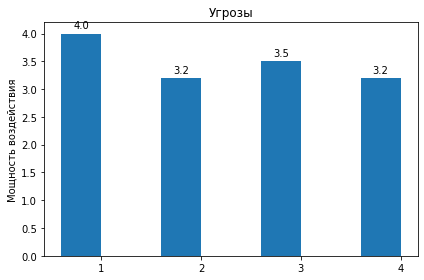

1 - Конкуренция на рынке
2 - Повышение цен на сырьё
3 - Броскость и надоедливость интерьера или тематики
4 - Увольнение повара или кондитера


In [ ]:
import os
import time
%ll -lAF /content/drive/MyDrive/"Colab Notebooks"/
os.stat('/content/drive/MyDrive/Colab Notebooks/SWOT.gsheet')
table = gs.open_by_key('1qlFhIagqcxFTlBYO9JMjfjkEijc-IQ7f6GM-4QAsq_w')
worksheet = table.worksheet('Threats')
rows = worksheet.get_all_values()
name = list()
actions = list()
importance = list()
probability = list()
power = list()
power_sh = list()
power_raw = list()
i=0
for row in rows:
  if(i>0):
    print (i, row)
    name.append(row[0])
    actions.append(row[1])
    importance.append(int(row[2]))
    probability.append(float(row[3]))
    power.append(int(row[2])*float(row[3]))
    power_raw = list()
    power_raw.append(int(row[2])*float(row[3]))
    power_sh.append(power_raw)
  i+=1
worksheet.update('E2:E8', power_sh)
print('\n',name, actions, importance, probability, power, sep='\n', end='\n\n')
threats_sum = sum(power)
print('Суммарная сила сильный сторон:', threats_sum)
worksheet.update('F2', threats_sum)

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
i=0
labels = list()
cols = worksheet.col_values(1)
for col in cols:
  if(i>0):
    labels.append(i)
  i+=1
width = 0.4  
fig, ax = plt.subplots()
x = np.arange(len(labels))
rects = ax.bar(x - width/2, power, width)
ax.set_ylabel('Мощность воздействия')
ax.set_title('Угрозы')
ax.set_xticks(x)
ax.set_xticklabels(labels)
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects) 
fig.tight_layout()
plt.show()              
j=0
for col in cols: 
  if(j>0):
    print(j, '-', col)
  j+=1

Результат: 23.799999999999997


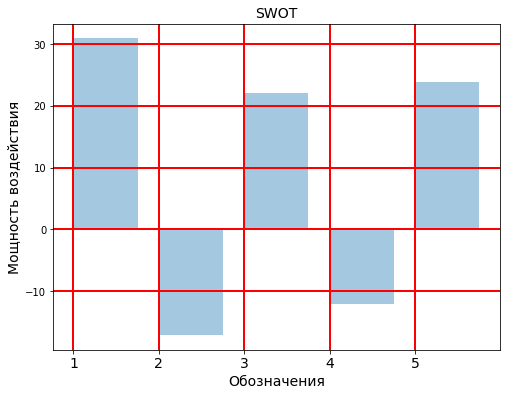

1  -  Сильные стороны
2  -  Слабые стороны
3  -  Возможности
4  -  Угорозы
5  -  Результат


In [ ]:

worksheet = table.worksheet('Strengths')
strengths_power = worksheet.acell('F2').value
worksheet = table.worksheet('Weaknesses')
weaknesses_power = worksheet.acell('F2').value
worksheet = table.worksheet('Opportunities')
opportunities_power = worksheet.acell('F2').value
worksheet = table.worksheet('Threats')
threats_power = worksheet.acell('F2').value
worksheet = table.worksheet('Result')
worksheet.update('A1', 'Суммарная сила сильных сторон')
worksheet.update('A2', strengths_power)
worksheet.update('B1', 'Суммарная сила слабых сторон') 
worksheet.update('B2', weaknesses_power)
worksheet.update('A4', 'Суммарная сила возможностей') 
worksheet.update('A5', opportunities_power)
worksheet.update('B4', 'Суммарная сила угроз') 
worksheet.update('B5', threats_power)
result = float(strengths_power) - 1*float(weaknesses_power) + float(opportunities_power) - 1*float(threats_power)
print('Результат:', result)
worksheet = table.worksheet('Result')
worksheet.update('A7', 'Результат')
worksheet.update('A8', result)
def matplot(element):
    import matplotlib.pyplot as plt
    x=list()
    x_float=list()
    title=list()
    y_float=list()
x_float = [1, 2, 3, 4, 5]
y_float = [float(strengths_power), -1*float(weaknesses_power), float(opportunities_power), -1*float(threats_power),  result]
title = [ "Сильные стороны", "Слабые стороны", "Возможности", "Угорозы", "Результат"]
x_pos=list()
i=0
for i in range(x_float.__len__()):
  x_pos.append(i)
fig=plt.figure(figsize=(8,6), dpi=72)
plt.bar(x_pos, y_float, width=0.75, align='edge', alpha=0.4)
plt.xticks(x_pos,  x_float, fontsize=14)
plt.xlabel('Обозначения', fontsize=14)
plt.ylabel('Мощность воздействия', fontsize=14)
plt.title('SWOT', fontsize=14)
plt.grid(True, color='r', linestyle='-', linewidth=2)
plt.show()
for i in range(title.__len__()):
  print(i+1, " - ", title[i])
  i += 1